#Data Loading

In [1]:
# install kaggle
import requests
URL = "https://raw.githubusercontent.com/rezaafaisal/source/main/kaggle.json"
response = requests.get(URL)
open("kaggle.json", "wb").write(response.content)

!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 68 Sep 22 01:56 kaggle.json


In [2]:
# unduh dataset kaggle (zip)
!kaggle datasets download -d prakharrathi25/banking-dataset-marketing-targets

  0% 0.00/576k [00:00<?, ?B/s]
100% 576k/576k [00:00<00:00, 65.8MB/s]


In [3]:
# import library yang digunakan
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder

In [4]:
# ekstrak dataset
shutil.unpack_archive('/content/banking-dataset-marketing-targets.zip', 'dataset')

In [5]:
# memuat data
train_df = pd.read_csv("/content/dataset/train.csv", sep=";",)
test_df = pd.read_csv("/content/dataset/test.csv", sep=";")

# gabung data train dan
merged_df = pd.concat([train_df, test_df], ignore_index=False, sort=False)

#Exploratory Data Anylisis

In [6]:
# preview data
merged_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# cek tipe data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [8]:
# cek dimensi awal
merged_df.shape

(49732, 17)

## Menangani Missing Value

In [9]:
# cek missing value
merged_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# cek data duplikat
merged_df.duplicated().sum()

4521

In [11]:
# hapus data duplicate
merged_df = merged_df.drop_duplicates()

In [12]:
merged_df.shape

(45211, 17)

##Menangani Outlier

In [13]:
merged_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='balance'>

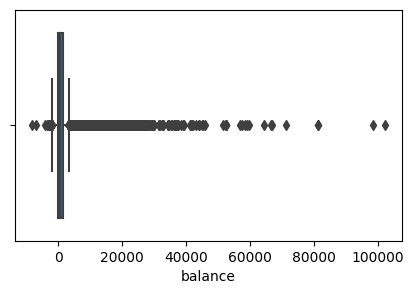

In [14]:
# cek outlier fitur balance
plt.figure(figsize=(5,3))
sns.boxplot(x=merged_df.balance)

<Axes: xlabel='duration'>

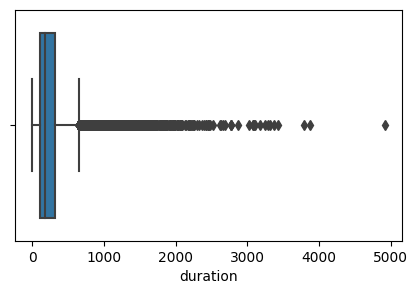

In [15]:
# cek outlier fitur duration
plt.figure(figsize=(5,3))
sns.boxplot(x=merged_df.duration)

In [16]:
# menghapus outlier
outlier_columns = ['balance', 'duration']

Q1 = merged_df[outlier_columns].quantile(0.25)
Q3 = merged_df[outlier_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = merged_df[~((merged_df<lower_bound)|(merged_df>upper_bound)).any(axis=1)]

<ipython-input-16-26be44cc9ea0>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_df = merged_df[~((merged_df<lower_bound)|(merged_df>upper_bound)).any(axis=1)]


In [17]:
new_df.shape

(37659, 17)

In [18]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##Univariate Analysis

In [19]:
# menentukan feature numerik dan kategorik
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

job
               jumlah sampel  persentase
blue-collar             8284        22.0
management              7575        20.1
technician              6394        17.0
admin.                  4462        11.8
services                3573         9.5
retired                 1765         4.7
self-employed           1279         3.4
entrepreneur            1243         3.3
unemployed              1034         2.7
housemaid               1023         2.7
student                  794         2.1
unknown                  233         0.6


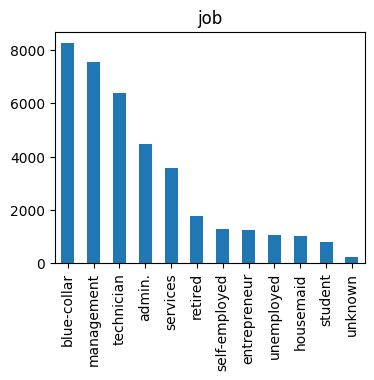



marital
          jumlah sampel  persentase
married           22575        59.9
single            10688        28.4
divorced           4396        11.7


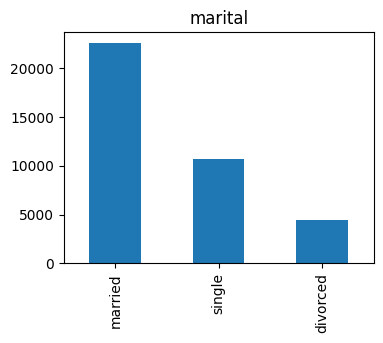



education
           jumlah sampel  persentase
secondary          19765        52.5
tertiary           10662        28.3
primary             5717        15.2
unknown             1515         4.0


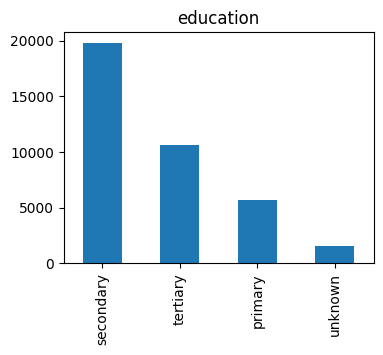



default
     jumlah sampel  persentase
no           36908        98.0
yes            751         2.0


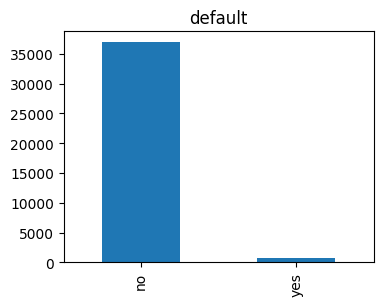



housing
     jumlah sampel  persentase
yes          21202        56.3
no           16457        43.7


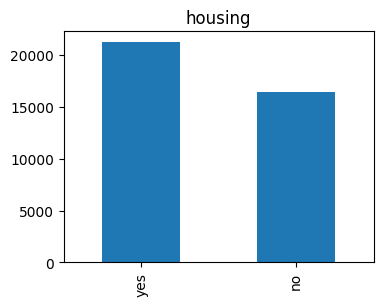



loan
     jumlah sampel  persentase
no           31268        83.0
yes           6391        17.0


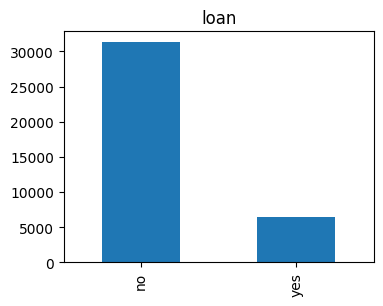



contact
           jumlah sampel  persentase
cellular           24259        64.4
unknown            11056        29.4
telephone           2344         6.2


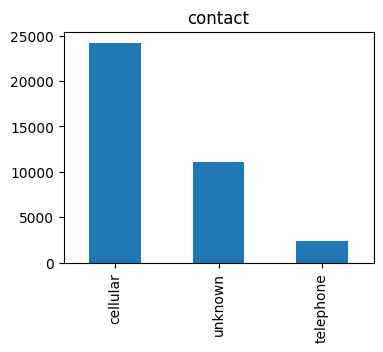



month
     jumlah sampel  persentase
may          11859        31.5
jul           5918        15.7
aug           5264        14.0
jun           4366        11.6
nov           2851         7.6
apr           2351         6.2
feb           2256         6.0
jan           1238         3.3
oct            558         1.5
sep            457         1.2
mar            379         1.0
dec            162         0.4


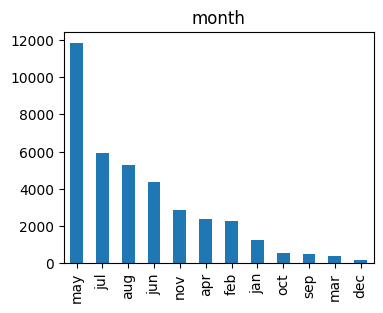



poutcome
         jumlah sampel  persentase
unknown          30839        81.9
failure           4102        10.9
other             1533         4.1
success           1185         3.1


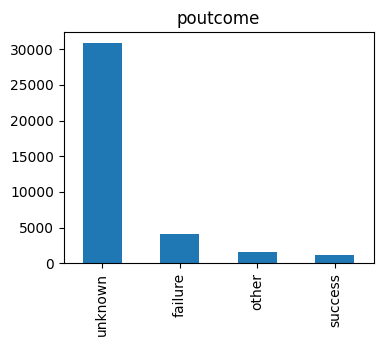



y
     jumlah sampel  persentase
no           34557        91.8
yes           3102         8.2


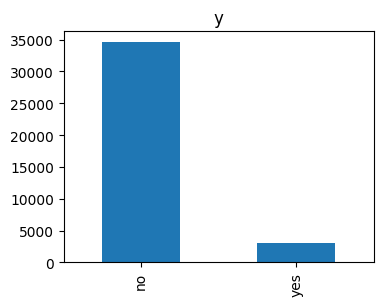

In [20]:
# menampilkan semua categorical
for categorical_feature in categorical_features:
  count = new_df[categorical_feature].value_counts()
  percent = 100*new_df[categorical_feature].value_counts(normalize=True)
  df = pd.DataFrame({
      'jumlah sampel': count,
      'persentase': percent.round(1)
  })
  print(f"{categorical_feature}")
  print(df)

  plt.figure(figsize=(4,3))
  count.plot(kind='bar', title=categorical_feature)
  plt.show()
  print("\n")

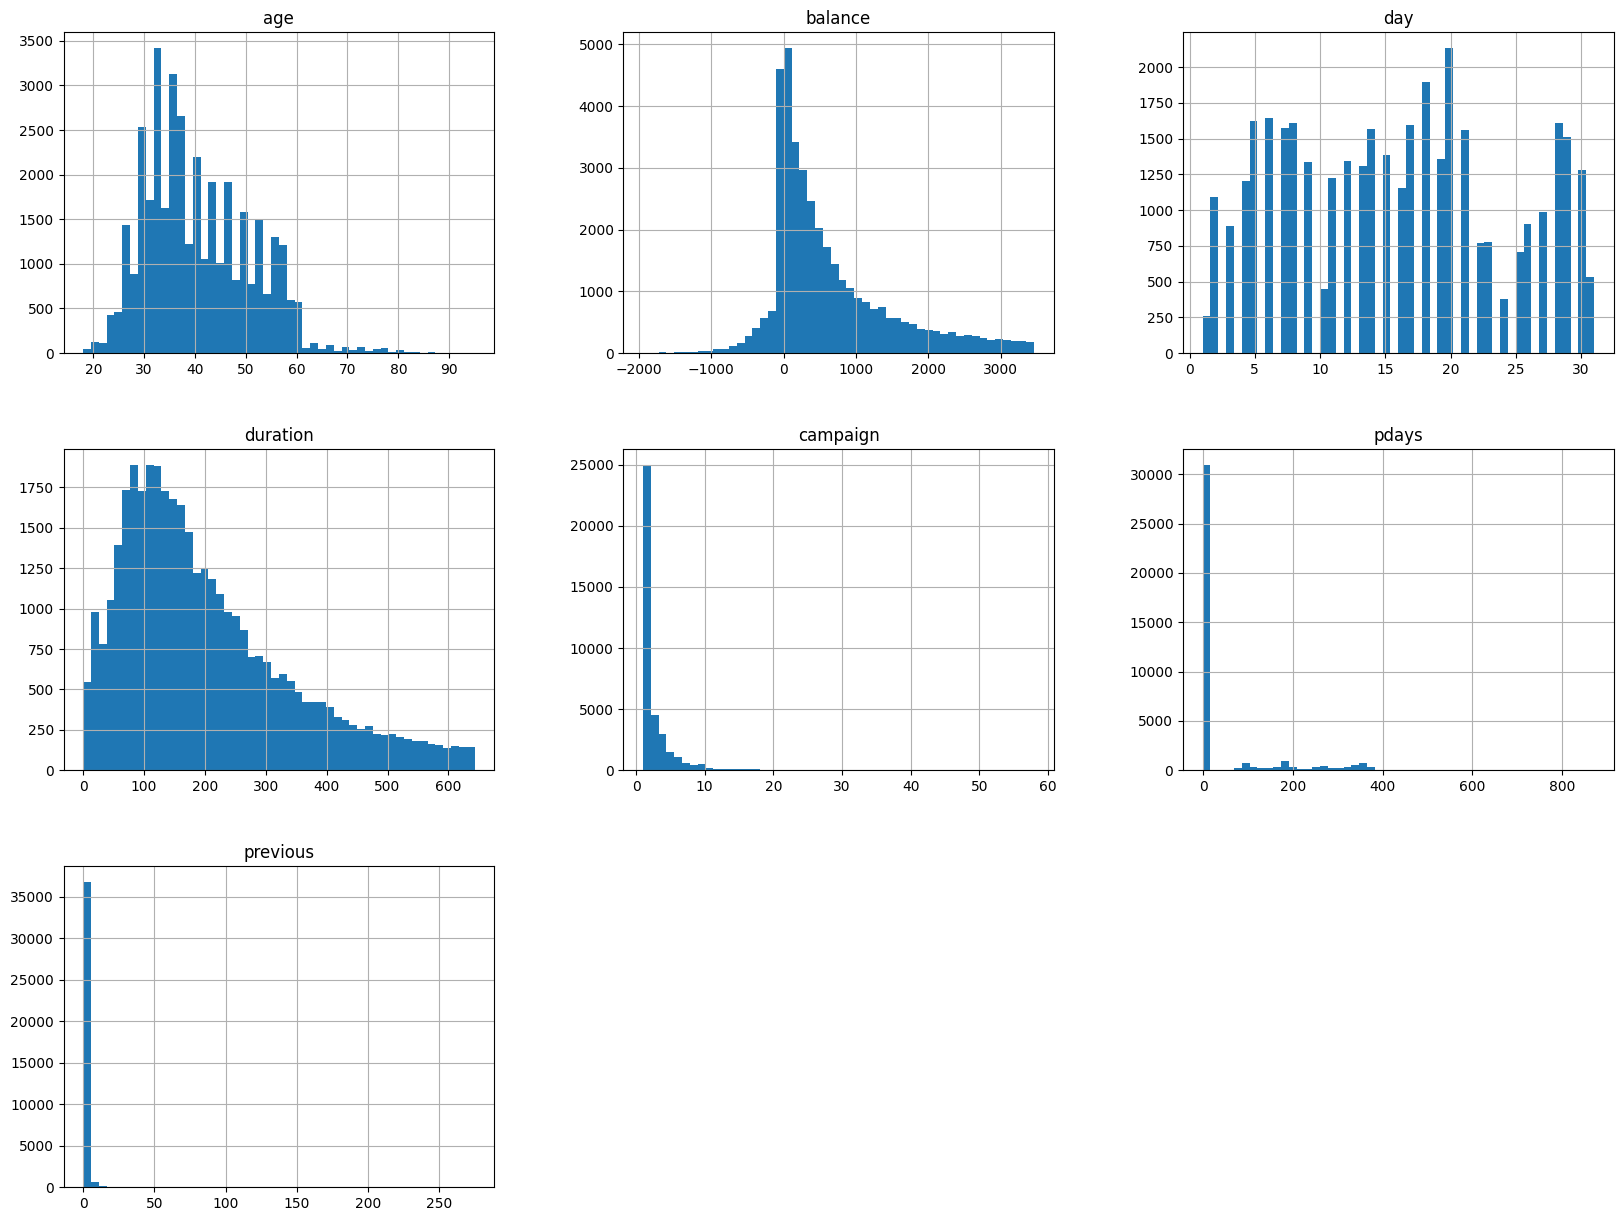

In [21]:
# menghitung numerik
new_df.hist(bins=50, figsize=(20, 15))
plt.show()

## Multivariate Analysis

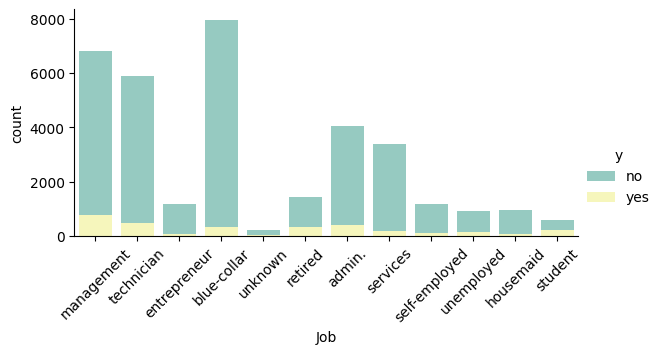

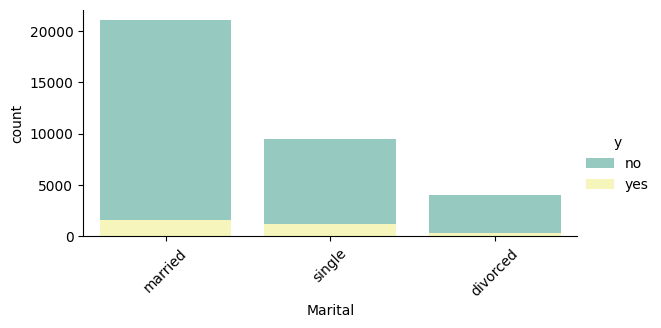

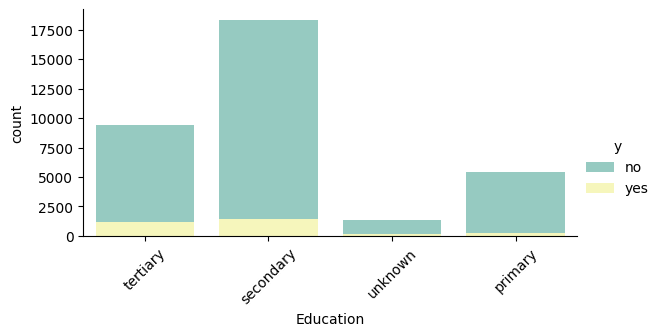

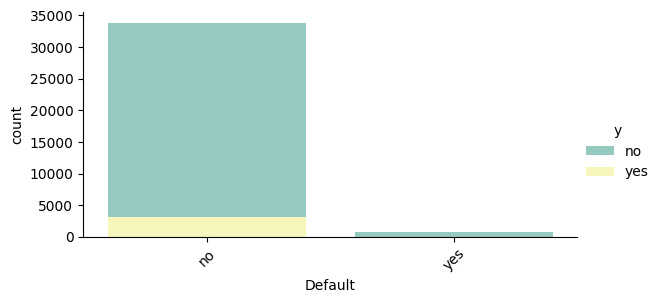

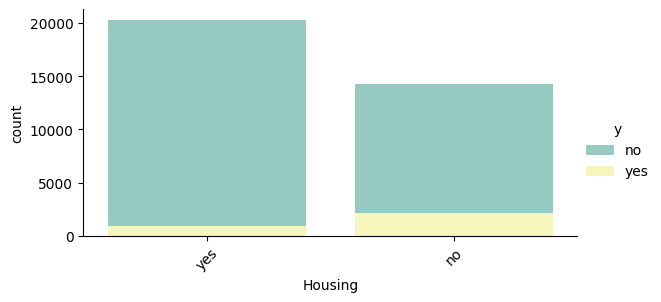

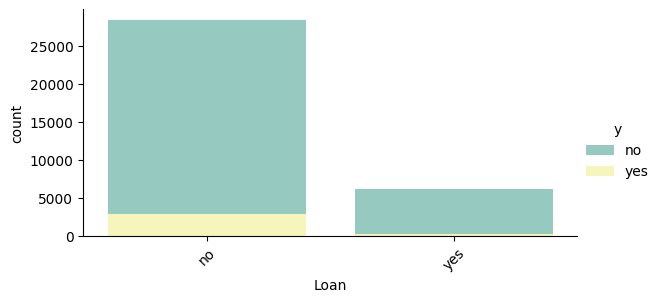

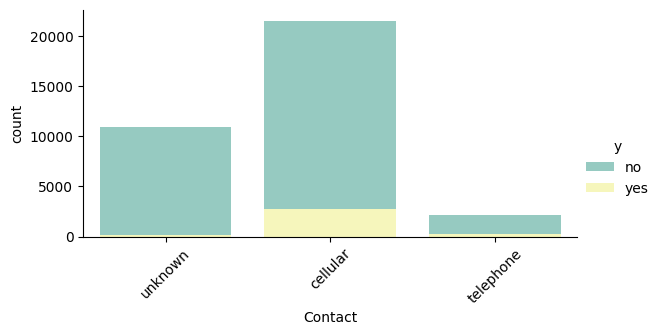

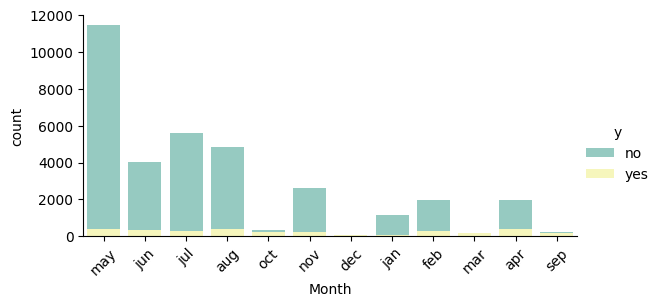

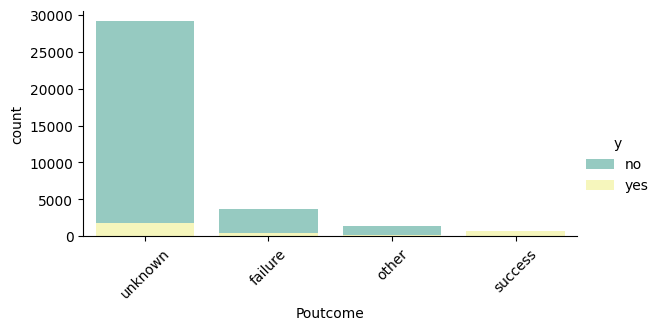

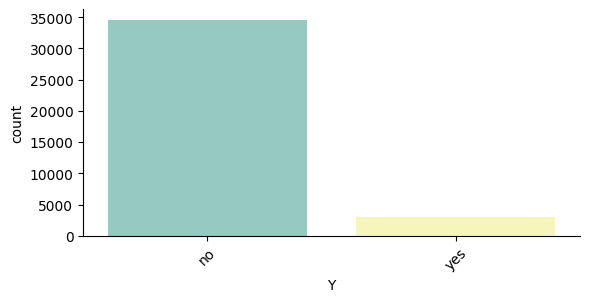

In [22]:
categorical_features = new_df.select_dtypes(include='object').columns.to_list()

for column in categorical_features:
  sns.catplot(x=column, kind='count', dodge=False, palette="Set3", hue='y', height=3, aspect=2, data=new_df)
  plt.xlabel(column.capitalize())
  plt.xticks(rotation=45)
  plt.show()
  print("\n")

<ipython-input-23-c4f3c67d54d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({
<ipython-input-23-c4f3c67d54d7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=new_df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)


Text(0.5, 1.0, 'Korelasi Untuk Fitur Numerik')

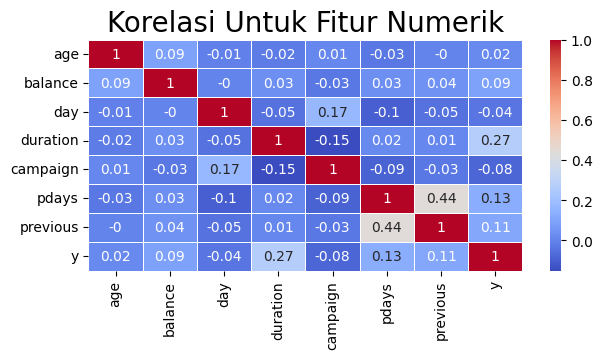

In [23]:
# mengecek korelasi antar fitur
new_df.replace({
    'y': {'yes': 1, 'no':0}
}, inplace=True)

plt.figure(figsize=(7, 3))
sns.heatmap(data=new_df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Untuk Fitur Numerik", size=20)

# Data Preparation

In [24]:
# hapus kolom age dan day karena korelasinya kecil
new_df.drop(['age', 'day'], axis=1, inplace=True)

<ipython-input-24-f650c799d8fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['age', 'day'], axis=1, inplace=True)


In [25]:
# ganti tipe data menjadi binominal
new_df.replace({
    'default': {'yes': 1, 'no': 0},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'yes': 1, 'no': 0},
    }, inplace=True)

<ipython-input-25-9895710f558e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({


In [26]:
# ganti nama bulan menjadi angka
new_df.replace({
    'month': {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12,
    }
}, inplace=True)

<ipython-input-26-b13c7e0aa6fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({


In [27]:
new_df.head()

,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,0,2143,1,0,unknown,5,261,1,-1,0,unknown,0
1,technician,single,secondary,0,29,1,0,unknown,5,151,1,-1,0,unknown,0
2,entrepreneur,married,secondary,0,2,1,1,unknown,5,76,1,-1,0,unknown,0
3,blue-collar,married,unknown,0,1506,1,0,unknown,5,92,1,-1,0,unknown,0
4,unknown,single,unknown,0,1,0,0,unknown,5,198,1,-1,0,unknown,0


In [28]:
encode_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(new_df[encode_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encode_columns))

new_encoded_df = pd.concat([new_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

new_encoded_df.drop(encode_columns, axis=1, inplace=True)

In [29]:
print(new_encoded_df.shape)

(37659, 31)


In [30]:
pd.set_option('display.max_columns', None)
new_encoded_df.tail()

,default,balance,housing,loan,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
37654,0,2850,0,0,11,300,1,40,8,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37655,0,505,0,1,11,386,2,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37656,0,1729,0,0,11,456,2,-1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37657,0,668,0,0,11,508,4,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
37658,0,2971,0,0,11,361,2,188,11,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Development

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# bagi data latih dan data uji
x = new_encoded_df.drop(['y'], axis=1)
y = new_encoded_df['y']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
print(f"Total data latih : {len(x_train)}")
print(f"Total data uji : {len(x_test)}")

Total data latih : 30127
Total data uji : 7532


## Algoritma SVM

In [42]:
# latih model
svm_classifier = SVC(kernel='sigmoid', random_state=42, probability=True, verbose=True)
svm_classifier.fit(x_train, y_train)

[LibSVM]

SVC(kernel='sigmoid', probability=True, random_state=42, verbose=True)

Akurasi : 0.8601964949548593
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6927
           1       0.12      0.12      0.12       605

    accuracy                           0.86      7532
   macro avg       0.52      0.52      0.52      7532
weighted avg       0.86      0.86      0.86      7532



Text(0.5, 1.0, 'Confusion Matrix')

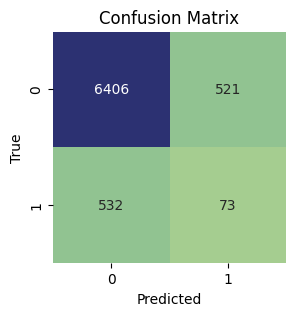

In [43]:
# akurasi
predict = svm_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predict)
print(f"Akurasi : {accuracy}")

# classification report
class_report = classification_report(y_test, predict)
print(class_report)

# konfusion matriks
conf = confusion_matrix(y_test, predict)

plt.figure(figsize=(3,3))
sns.heatmap(conf, annot=True, fmt='d', cmap='crest', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

## Algoritma Naural Network

In [44]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=12,
                              activation='relu',
                              n_iter_no_change=30,
                              solver='adam')
nn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=12, n_iter_no_change=30)

Akurasi : 0.9310939989378652
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6927
           1       0.65      0.31      0.42       605

    accuracy                           0.93      7532
   macro avg       0.79      0.65      0.69      7532
weighted avg       0.92      0.93      0.92      7532



Text(0.5, 1.0, 'Confusion Matrix')

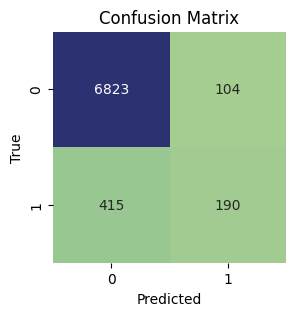

In [46]:
# akurasi
predict = nn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predict)
print(f"Akurasi : {accuracy}")

# classification report
class_report = classification_report(y_test, predict)
print(class_report)

# konfusion matriks
conf = confusion_matrix(y_test, predict)

plt.figure(figsize=(3,3))
sns.heatmap(conf, annot=True, fmt='d', cmap='crest', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')